First, we import all the necessary python libraries to be used here.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the excel file and convert it into a dataframe

In [81]:
df = pd.read_excel('employees_data.xlsx', 'Employees who have left')
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


#### Business Question 

The next step is figuring out the reason why we have been given this data. Our Analysis has to answer a given business problem/question.

In this case, the business questions are:

1. What type of employees are leaving?
2. Which employees are likely to leave next?

#### Data Inspection 

In [82]:
df. shape

(3571, 10)

In [83]:
df.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [84]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [85]:
df = df.drop(['Emp ID'], axis = 1)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


Check for Missing data

In [86]:
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3566,False,False,False,False,False,False,False,False,False
3567,False,False,False,False,False,False,False,False,False
3568,False,False,False,False,False,False,False,False,False
3569,False,False,False,False,False,False,False,False,False


In [87]:
sat_level = pd.isnull(df['satisfaction_level'])
df[sat_level]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary


Create a loop tocheck through all columns

In [88]:
attributes = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']

In [89]:
for attribute in attributes:
    
    null_check = pd.isnull(df[attribute])
    print(df[null_check])

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, dept, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, averag

### Data Exploration 

We begin by plotting a correlation heatmap.

In statistics, correlation refers to the statistical measure that quantifies the relationship between two or more variables. 

It helps us understand how changes in one variable are associated with changes in another variable. 

Correlation does not imply causation; it only shows the strength and direction of the linear relationship between the variables.

There are different types of correlation coefficients that can be used to measure the correlation between variables, with the most common one being the **Pearson correlation coefficient**. 

The Pearson correlation coefficient, denoted by **"r"**, measures the linear relationship between two continuous variables. 

It ranges from -1 to +1:

1. A correlation coefficient of -1 indicates a perfect negative correlation, where the    variables move in opposite directions with a strong linear relationship.

2. A correlation coefficient of 0 indicates no linear relationship between the variables (they are uncorrelated).

3. A correlation coefficient of +1 indicates a perfect positive correlation, where the variables move in the same direction with a strong linear relationship.

1. 0 - 0.1 No Correlation
2. 0.1 - 0.3 Low Correlation
3. 0.3 - 0.5 Medium Correlation
4. 0.5 - 0.7 High Correlation
5. 0.7 - 1 Very High Correlation

<Axes: >

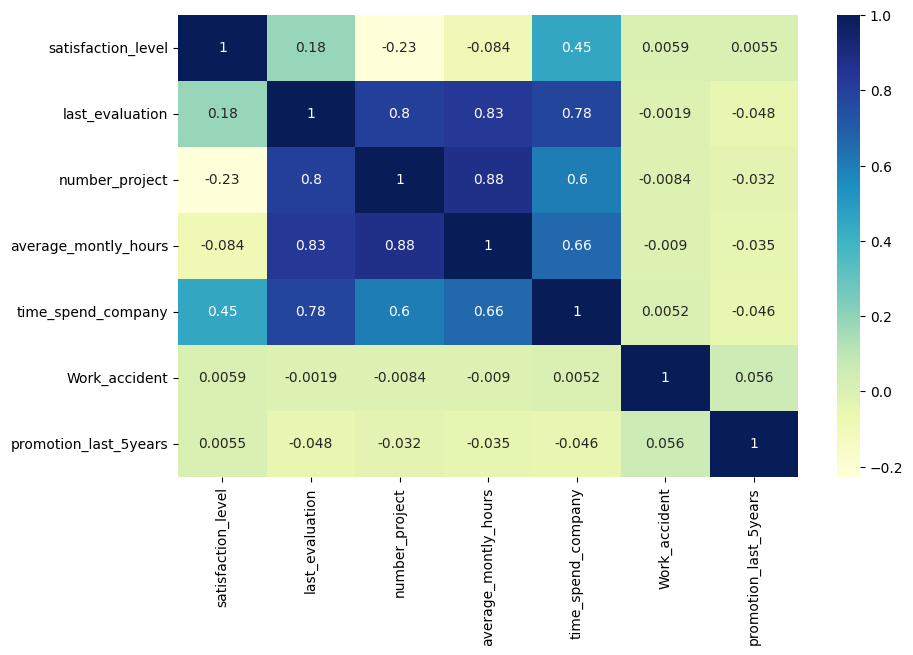

In [90]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'YlGnBu')

#### Correlation Analysis

1. A medium correlation of 0.45 exists between a job satisfaction level and the time spent in the company. Satisfaction level increase or decrease as more time is spent in the company

2. A very high correlation of exists between last evaluation score and time spent in the company (0.78), average monthly hours (0.83) and number of projects (0.8)

    - The more you stay in the company, the higher your last evalution score.
    - The shorter you stay in the company, the lower your last evalution score.
    - The more average monthly hours accrued, the higher your last evaluation score
    - The fewer the average monthly hours accrued, the lower your last evaluation score
    - The more the number of projects, the higher the last evaluation score.
    - The less the number of projects, the lower the last evaluation score.

<div class = 'alert alert-block alert-info'>

<b>Note:<b> Probably the departing employees had less average monthly hours, number of projects and short stint in the company.

</div>

Let's find this out

We do this by comparing the average monthly hours, number of time spent in the company and number of projects for the exiting employees and existing employees

In [91]:
df1 = pd.read_excel('employees_data.xlsx', 'Existing employees')
df1.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [92]:
df1.shape

(11428, 10)

##### a. Time spent in the company 

In [93]:
df_exist = df1['time_spend_company'].mean()
df_exit = df['time_spend_company'].mean()
print('Existing employees are {} and exiting are {}'.format(df_exist, df_exit))

Existing employees are 3.3800315015750786 and exiting are 3.876505180621675


Exiting employees have spent less time in the company compared to the existing. Why have they left?

##### b. Average monthly hours

In [94]:
df_exist = df1['average_montly_hours'].mean()
df_exit = df['average_montly_hours'].mean()
print('Existing employees are {} and exiting are {}'.format(df_exist, df_exit))

Existing employees are 199.0602030101505 and exiting are 207.41921030523662


Exiting employees spent more average monthly hours in the company than the existing ones. Possible explantion?

Not appreciated hnec they left

or 

It might just be because they worked in crucial department that are central to the company's core mandate.

or 

they might have acquired more experience hence left for other lucrative job

##### c. Number of Projects

In [95]:
df_exist = df1['number_project'].mean()
df_exit = df['number_project'].mean()
print('Existing employees are {} and exiting are {}'.format(df_exist, df_exit))

Existing employees are 3.786664333216661 and exiting are 3.8555026603192384


Employees who left had more number of projects thanthose who are still with the company.

The data suggests that they may have left due to dissatisfaction

3. There is a high correlation between the number of projects and time spent in the company.      There is a very high correlation between the number of projects and average monthly hours.

    - The higher the number of projects the more the average monthly hours.
    - The lower the number of projects the less the average monthly hours.
    - The higher the number of projects the more the average monthly hours
    - The lower the number of projects the less the average monthly hours

4. There is a high correlation between the average monthly hours and the time spent with the company (0.66)
    - The more time spent with the company, the higher the average monthly hours
    - The less time spent with the company, the lower the average monthly hours
    
   more experience, trust and more assignments

5. **Work accidents** and **promotion in the last 5 years** has little correlation with other features. If this was a model development problem, we could have dropped the column.

Also, two columns (*'Work_accident'* and *'promotion_last_5years'*) are of interest since they contain several zeros (**categorical data**).

We therefore zoom into them to have a close look.

This is done by using the **pandas** *'groupby'* function.

In [96]:
df_work_acc = df.groupby('Work_accident').size().reset_index(name = 'Work Accidents')
df_work_acc

,Work_accident,Work Accidents
0,0,3402
1,1,169


From the analysis, only 169 out of the 3571 exiting employees have had accident at work.

In [97]:
df_work_acc = df.groupby('promotion_last_5years').size().reset_index(name = 'Promotion')
df_work_acc

,promotion_last_5years,Promotion
0,0,3552
1,1,19


Only 19 out of the 3571 employees have been promoted in the last five years.

Strongly suggest that exiting employees may have not been motivated.


## Comparative Analysis

##### Will do a comparative analysis of the two datasets- "employees who have left" and "employee existing"; to know the type of employees who are leaving and the pattern.

In [98]:
# exploring the "employees who have left"

df = pd.read_excel('employees_data.xlsx', 'Employees who have left')
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [99]:
df.shape

(3571, 10)

In [100]:
df_evaluation = df.groupby('last_evaluation').size().reset_index(name = 'Numbers')
df_evaluation.head()

,last_evaluation,Numbers
0,0.45,65
1,0.46,162
2,0.47,113
3,0.48,136
4,0.49,113


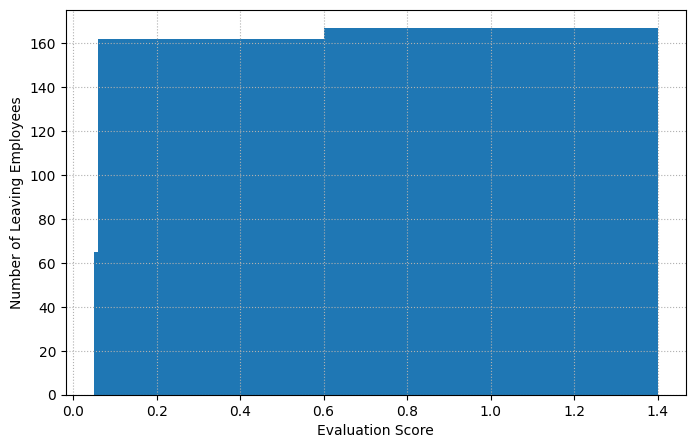

In [101]:
plt.figure(figsize = (8, 5))
plt.xlabel('Evaluation Score')
plt.ylabel('Number of Leaving Employees')
x = df_evaluation['last_evaluation']
y = df_evaluation['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')
plt.savefig('evaluation_score.jpg', dpi = 300)

In [102]:
df_number_project = df.groupby('number_project').size().reset_index(name = 'Numbers')
df_number_project

,number_project,Numbers
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


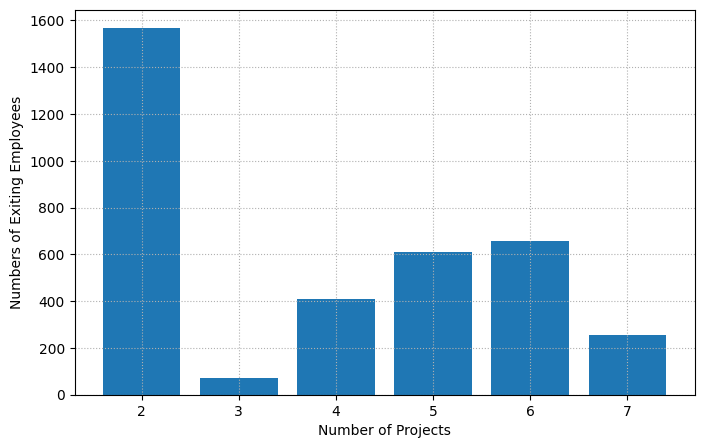

In [103]:
plt.figure(figsize = (8, 5))
plt.xlabel('Number of Projects')
plt.ylabel('Numbers of Exiting Employees')
x = df_number_project['number_project']
y = df_number_project['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')
plt.savefig('evaluation_score.jpg', dpi = 300)

In [104]:
df_evaluation = df.groupby('last_evaluation').size().reset_index(name = 'Evaluation Score')

df_number_project = df.groupby('number_project').size().reset_index(name = 'Projects')

df_monthly_hrs = df.groupby('average_montly_hours').size().reset_index(name = 'Monthly Hours')

df_time_spent = df.groupby('time_spend_company').size().reset_index(name = 'Time Spent')

df_dept = df.groupby('dept').size().reset_index(name = 'Department')

df_salary = df.groupby('salary').size().reset_index(name = 'Salary')

In [105]:
attributes = [df_evaluation, df_number_project, 
               df_monthly_hrs, df_time_spent, 
               df_dept, df_salary]

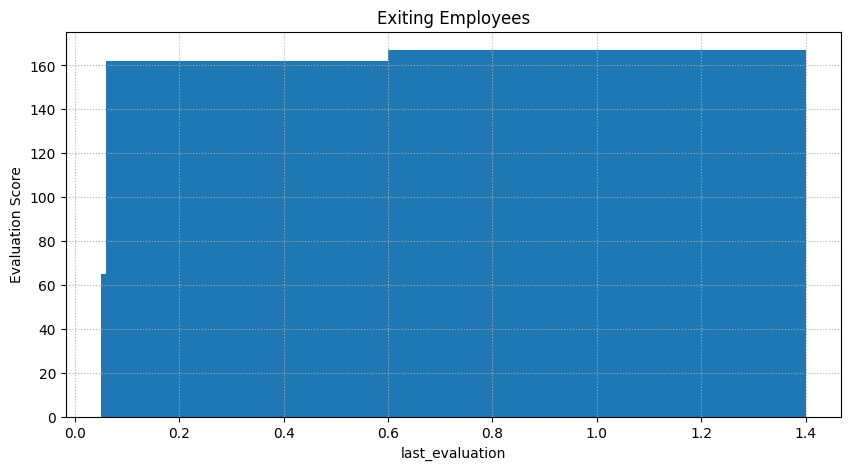

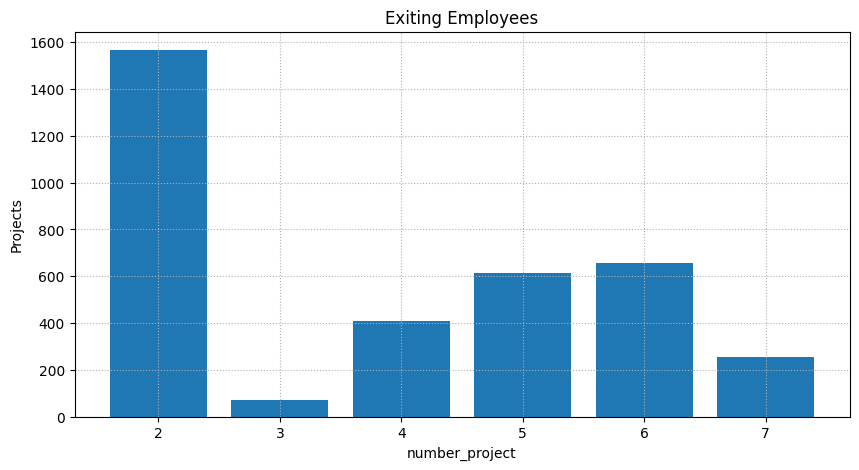

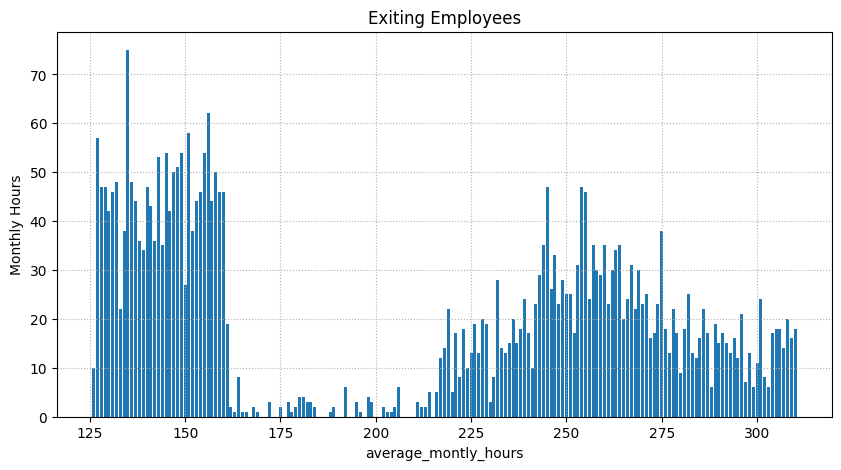

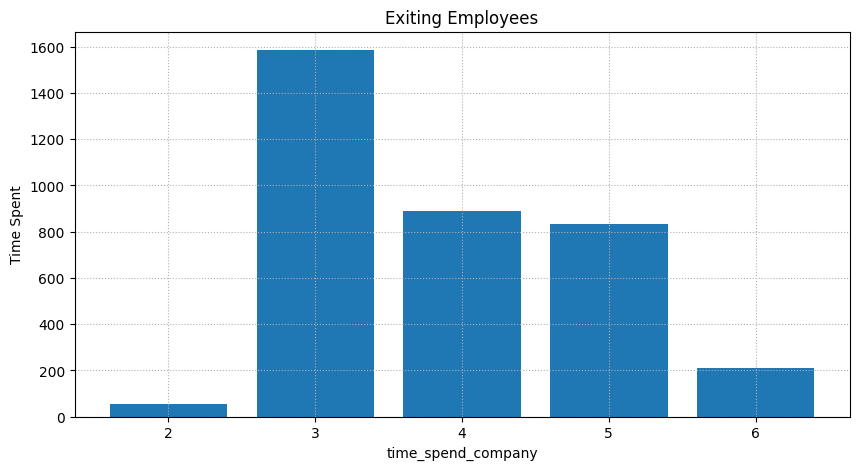

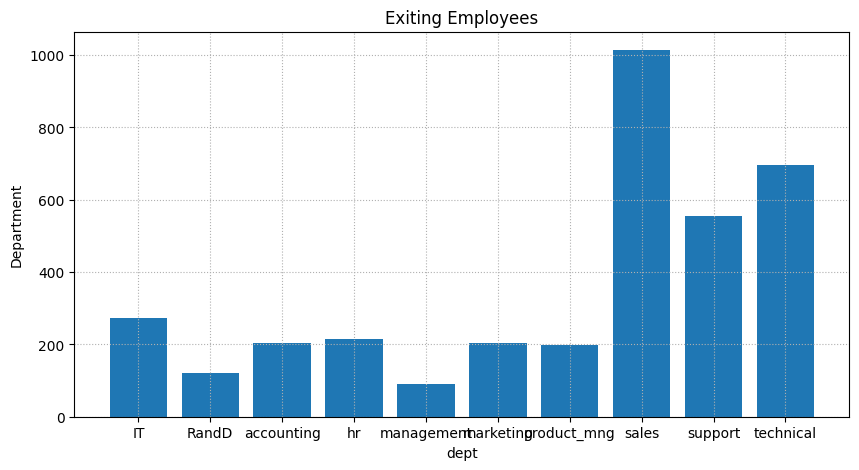

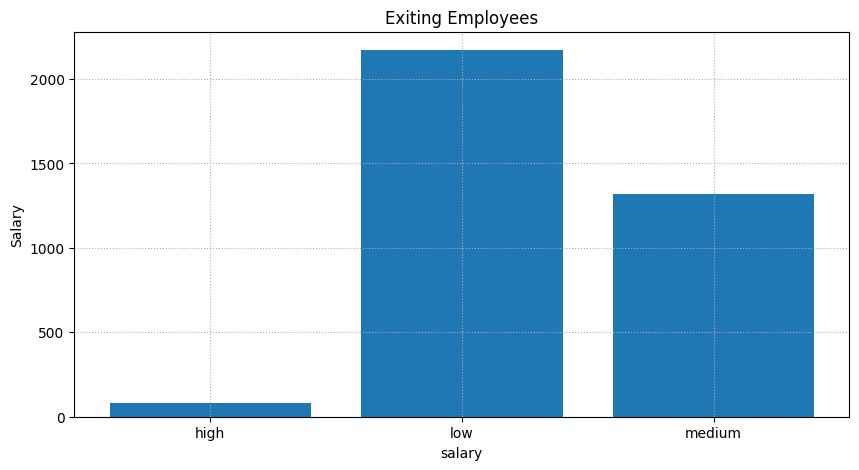

In [106]:
for attribute in attributes:
    plt.figure(figsize = (10, 5))
    plt.xlabel(str(attribute.columns[0]))
    plt.ylabel(str(attribute.columns[1]))
    plt.title('Exiting Employees')
    x = attribute[attribute.columns[0]]
    y = attribute[attribute.columns[1]]
    plt.bar(x, y)
    plt.grid(which = 'both', linestyle = ':')

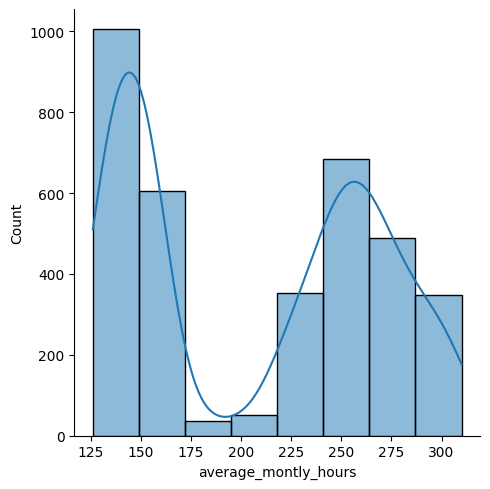

In [107]:
sns.displot(df['average_montly_hours'], kde = True, bins = 8)

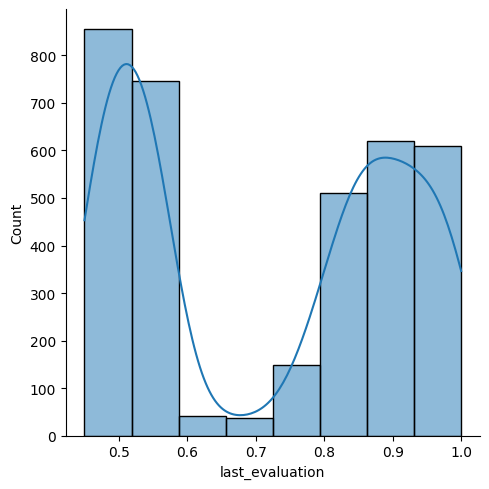

In [108]:
sns.displot(df['last_evaluation'], kde = True, bins = 8)

In [109]:
df.shape

(3571, 10)

Evaluation Score 4.68
Projects 43.88
Monthly Hours 2.1
Time Spent 44.41
Department 28.4
Salary 60.82


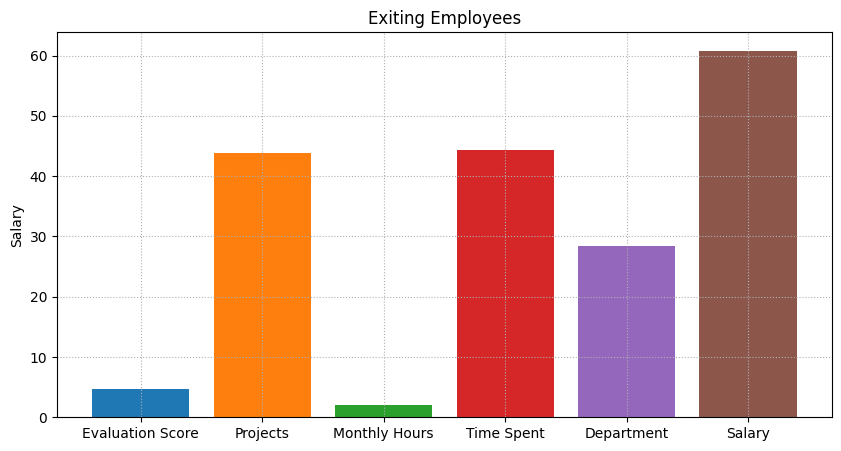

In [110]:
# Calculating the percentage of employees

plt.figure(figsize = (10, 5))
for attribute in attributes:
    total_exiting_employees = 3571
    high = attribute[attribute.columns[1]].max()
    percentage = round((high / total_exiting_employees)* 100, 2)
    name = attribute.columns[1]
    plt.ylabel(str(attribute.columns[1]))
    plt.title('Exiting Employees')
    plt.bar(name, percentage)
    print(str(name) + " " + str(percentage))
    plt.grid(which = 'both', linestyle = ':')

In [111]:
# number of existing employees

df1 = pd.read_excel('employees_data.xlsx', 'Existing employees')
df1.shape

(11428, 10)

In [113]:
(60.82/100)* 11428

6950.509599999999